# BDC Project

## Data Wrangling

In [1]:
#Import libraries and  Initialize Dataframe
#Delimiter ';' needs to included in 'sep' parameter
import pandas as pd
import numpy as np
cvd_df = pd.read_csv("cardio_train.csv", sep = ';')

#Preview first 10 rows of data
cvd_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [2]:
#1. Make the id values consistent and set column 'id' as index
cvd_df['id'] = np.arange(len(cvd_df))
cvd_df.set_index('id', inplace = True)
cvd_df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0


In [3]:
#Convert column names to more readable and understandable names
cvd_df.rename(columns = {'ap_hi':'systolic_bp', 'ap_lo':'diastolic_bp', 'gluc':'glucose', 
                         'alco':'alcohol', 'active':'physical_activity', 
                         'cardio':'cvd_presence'}, inplace = True)
cvd_df.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,physical_activity,cvd_presence
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Convert 'age' column from days to years format
cvd_df['age'] = (cvd_df['age'])/365

#Set data type as integer
cvd_df['age'] = cvd_df['age'].astype('int')
cvd_df.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,physical_activity,cvd_presence
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#Check presence of null values
cvd_df.isnull().sum()

age                  0
gender               0
height               0
weight               0
systolic_bp          0
diastolic_bp         0
cholesterol          0
glucose              0
smoke                0
alcohol              0
physical_activity    0
cvd_presence         0
dtype: int64

In [6]:
#Verify data types
cvd_df.dtypes

age                    int32
gender                 int64
height                 int64
weight               float64
systolic_bp            int64
diastolic_bp           int64
cholesterol            int64
glucose                int64
smoke                  int64
alcohol                int64
physical_activity      int64
cvd_presence           int64
dtype: object

In [7]:
#Check for outliers in Dataframe
cvd_df.describe()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,physical_activity,cvd_presence
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Remove outliers in 'systolic_bp' and set a range of values
cvd_df = cvd_df[(cvd_df.systolic_bp >= 60) & (cvd_df.systolic_bp <= 240)]

#Remove outliers in 'diastolic_bp' and set a range of values
cvd_df = cvd_df[(cvd_df.diastolic_bp >= 10) & (cvd_df.diastolic_bp < 190)]

#Remove outliers in 'weight' and set a range of values
cvd_df = cvd_df[cvd_df.weight >= 45]

#Re-check for outliers in the Dataframe
cvd_df.describe()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,physical_activity,cvd_presence
count,68503.000000,68503.000000,68503.000000,68503.000000,68503.000000,68503.000000,68503.000000,68503.000000,68503.000000,68503.000000,68503.000000,68503.000000
mean,52.832226,1.349941,164.411894,74.265052,126.670029,81.385180,1.365093,1.226238,0.088201,0.053720,0.803162,0.495920
std,6.764537,0.476954,8.152110,14.191982,16.737646,9.721315,0.679374,0.572242,0.283588,0.225467,0.397612,0.499987
min,29.000000,1.000000,55.000000,45.000000,60.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Dataframe after data wrangling steps
cvd_df.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,physical_activity,cvd_presence
id,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


## EDA

In [10]:
#Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline returns output plots without needing to write plt.show() code everytime after each plot
%matplotlib inline

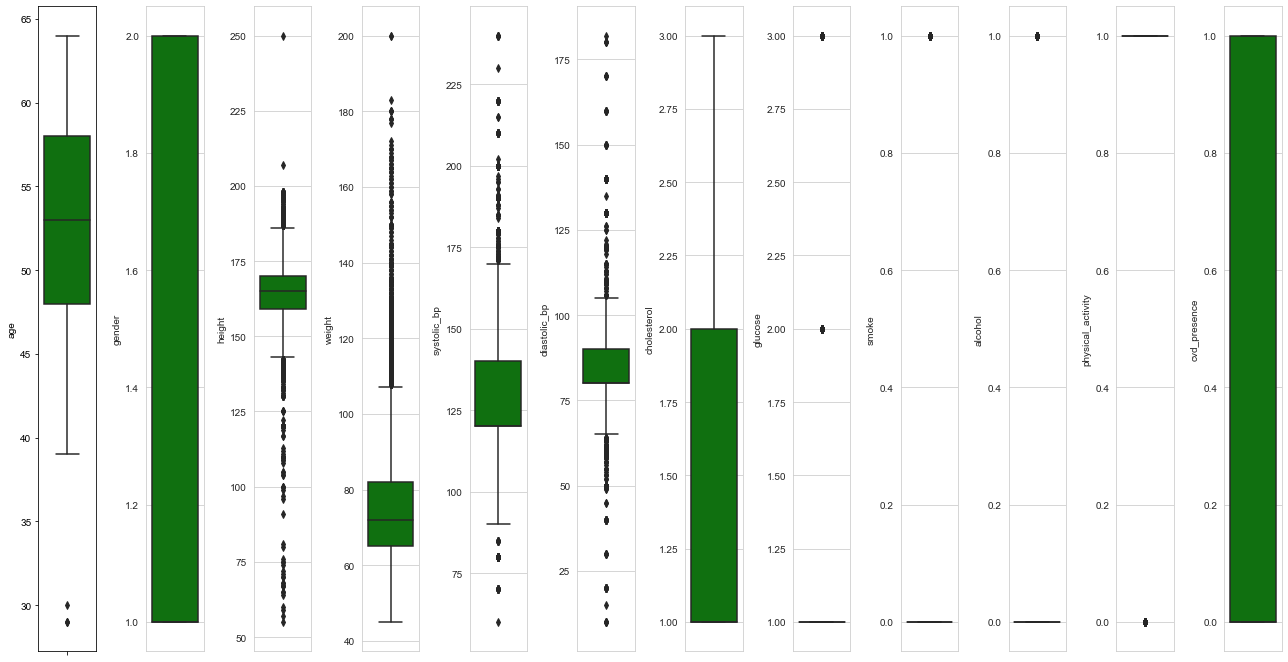

In [11]:
#Code block to plot all 12 columns boxplots 
length = cvd_df.columns.values
number_of_columns=12
number_of_rows = int(len(length)-1/number_of_columns)
plt.figure(figsize=(1.5*number_of_columns,10*number_of_rows))
for i in range(0,len(length)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=cvd_df[length[i]],color='green',orient='v')
    plt.tight_layout()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

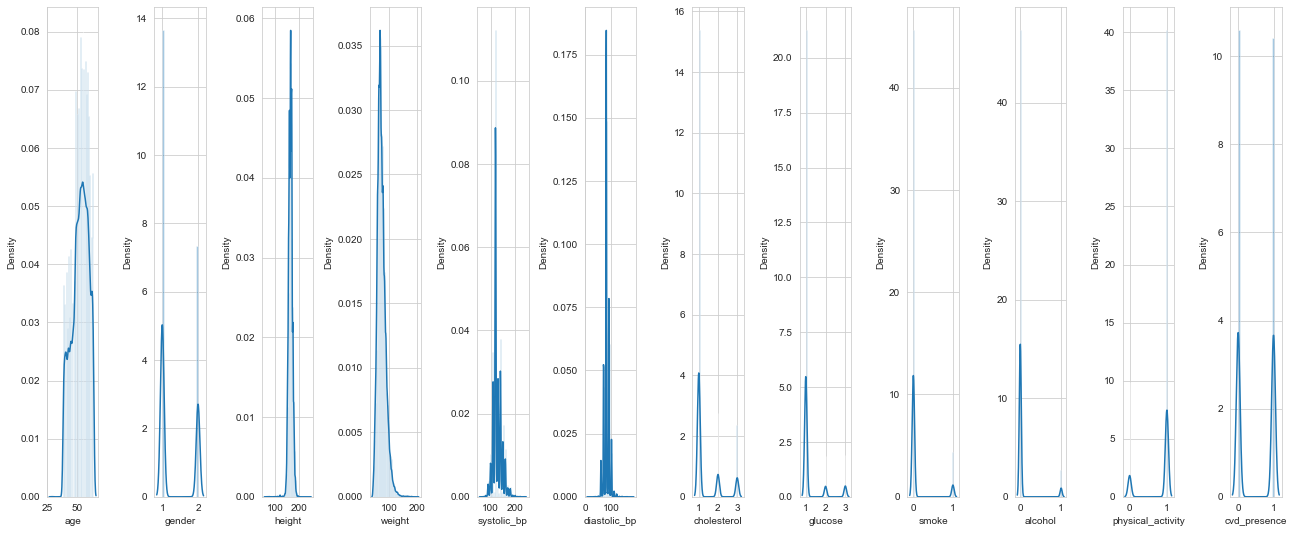

In [12]:
#Code block to plot distribution plot
plt.figure(figsize=(1.5*number_of_columns,8*number_of_rows))
for i in range(0,len(length)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(cvd_df[length[i]],kde=True) 
    plt.tight_layout()

<AxesSubplot:>

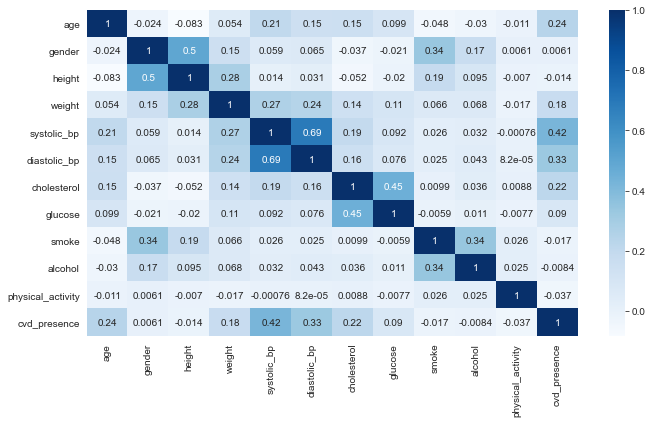

In [13]:
#Plot correlation matrix
plt.figure(figsize=(11,6))
sns.heatmap(cvd_df.corr(),cmap='Blues',annot=True) 

<AxesSubplot:>

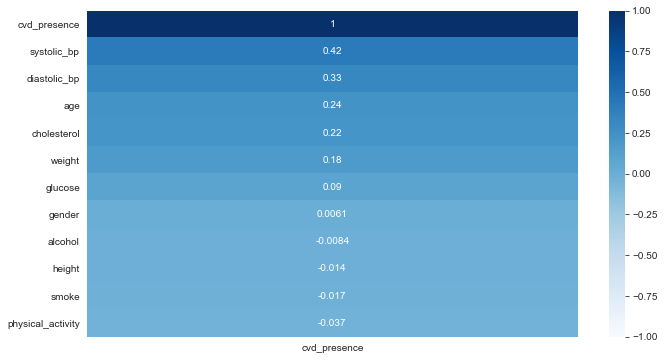

In [14]:
#Plot features correlating with ‘cvd_presence’
plt.figure(figsize=(11,6))
sns.heatmap(cvd_df.corr()[['cvd_presence']].sort_values(by='cvd_presence', 
ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

## Data Aggregation and Grouping


Data Aggregation is done based on the proposed research questions

### Research Questions

1. What is the highest risk factor for cardiovascular disease?

a) Systolic Blood Pressure

In [15]:
#1.What is the highest risk factor for cardiovascular disease?
#Systolic:1=Normal,2=Above Normal,3=Well Above Normal

def systolic(row):
    if row["systolic_bp"] <=120:
        return "1"
    elif 120< row["systolic_bp"] <129:
        return "2"
    else:
        return "3"

cvd_df['systolic_bp_categorised']=cvd_df.apply(systolic,axis=1)
print (cvd_df)


       age  gender  height  weight  systolic_bp  diastolic_bp  cholesterol  \
id                                                                           
0       50       2     168    62.0          110            80            1   
1       55       1     156    85.0          140            90            3   
2       51       1     165    64.0          130            70            3   
3       48       2     169    82.0          150           100            1   
4       47       1     156    56.0          100            60            1   
...    ...     ...     ...     ...          ...           ...          ...   
69995   52       2     168    76.0          120            80            1   
69996   61       1     158   126.0          140            90            2   
69997   52       2     183   105.0          180            90            3   
69998   61       1     163    72.0          135            80            1   
69999   56       1     170    72.0          120            80   

In [16]:
Count_systolic=cvd_df.groupby(['cvd_presence','systolic_bp_categorised'])['cvd_presence'].count()
Count_systolic

cvd_presence  systolic_bp_categorised
0             1                          27466
              2                            366
              3                           6699
1             1                          12805
              2                            212
              3                          20955
Name: cvd_presence, dtype: int64

In [17]:
#use this in visualization
Count_Systolic_Visualization = Count_systolic

b) Diastolic Blood Pressure

In [18]:
#Diastolic:1=Normal,2=Above Normal,3=Well Above Normal

def diastolic(row):
    if row["diastolic_bp"] <=80:
        return "1"
    elif 80< row["diastolic_bp"] <89:
        return "2"
    else:
        return "3"

cvd_df['diastolic_bp_categorised']=cvd_df.apply(diastolic,axis=1)
print (cvd_df)

       age  gender  height  weight  systolic_bp  diastolic_bp  cholesterol  \
id                                                                           
0       50       2     168    62.0          110            80            1   
1       55       1     156    85.0          140            90            3   
2       51       1     165    64.0          130            70            3   
3       48       2     169    82.0          150           100            1   
4       47       1     156    56.0          100            60            1   
...    ...     ...     ...     ...          ...           ...          ...   
69995   52       2     168    76.0          120            80            1   
69996   61       1     158   126.0          140            90            2   
69997   52       2     183   105.0          180            90            3   
69998   61       1     163    72.0          135            80            1   
69999   56       1     170    72.0          120            80   

In [19]:
Count_diastolic=cvd_df.groupby(['cvd_presence','diastolic_bp_categorised'])['cvd_presence'].count()
Count_diastolic

cvd_presence  diastolic_bp_categorised
0             1                           29829
              2                             226
              3                            4476
1             1                           18692
              2                             255
              3                           15025
Name: cvd_presence, dtype: int64

In [20]:
#use this in visualization
Count_Diastolic_Visualization = Count_diastolic

c) Smoke

In [21]:
#Count of smoke 
Count_Smoke= cvd_df.groupby(['cvd_presence','smoke'])['cvd_presence'].count()
Count_Smoke

cvd_presence  smoke
0             0        31324
              1         3207
1             0        31137
              1         2835
Name: cvd_presence, dtype: int64

In [22]:
#use this in visualization
Count_Smoke_Visualization = Count_Smoke

d) Alcohol

In [23]:
#Count of Alcohol
Count_Alcohol=cvd_df.groupby(['cvd_presence','alcohol'])['cvd_presence'].count()
Count_Alcohol

cvd_presence  alcohol
0             0          32611
              1           1920
1             0          32212
              1           1760
Name: cvd_presence, dtype: int64

In [24]:
#use this in visualization
Count_Alcohol_Visualization = Count_Alcohol

e) Physical Activity

In [25]:
#Count of Physical_Activity
Count_Active=cvd_df.groupby(['cvd_presence','physical_activity'])['cvd_presence'].count()
Count_Active

cvd_presence  physical_activity
0             0                     6292
              1                    28239
1             0                     7192
              1                    26780
Name: cvd_presence, dtype: int64

In [26]:
#use this in visualization
Count_Active_Visualization = Count_Active

f) Cholesterol

In [27]:
#Count of cholesterol 
Count_Cholesterol=cvd_df.groupby(['cvd_presence','cholesterol'])['cvd_presence'].count()
Count_Cholesterol

cvd_presence  cholesterol
0             1              28936
              2               3730
              3               1865
1             1              22426
              2               5542
              3               6004
Name: cvd_presence, dtype: int64

In [28]:
#use this in visualization
Count_Cholesterol_Visualization = Count_Cholesterol

g) Glucose

In [29]:
#Count of glucose
Count_Glucose=cvd_df.groupby(['cvd_presence','glucose'])['cvd_presence'].count()
Count_Glucose

cvd_presence  glucose
0             1          30468
              2           2074
              3           1989
1             1          27757
              2           2984
              3           3231
Name: cvd_presence, dtype: int64

In [30]:
#use this in visualization
Count_Glucose_Visualization = Count_Glucose

2.Are gender plays an important role of the risk of getting cardiovascular disease?

In [31]:
Gender_Count=cvd_df.groupby(['gender','cvd_presence'])['cvd_presence'].count()
Gender_Count

gender  cvd_presence
1       0               22547
        1               21984
2       0               11984
        1               11988
Name: cvd_presence, dtype: int64

3. What is the percentage of woman to get cardiovascular disease compared to man?

In [32]:
Gender_Count2=cvd_df.groupby(['gender','cvd_presence'])['cvd_presence'].count().reset_index(name='count')
Gender_Count2

,gender,cvd_presence,count
0,1,0,22547
1,1,1,21984
2,2,0,11984
3,2,1,11988


In [33]:
Gender_Count2['percentage']=((Gender_Count2['count']/Gender_Count2['count'].sum())*100)
Gender_Count2.style.format({'percentage':"{:.2f}"})

,gender,cvd_presence,count,percentage
0,1,0,22547,32.91
1,1,1,21984,32.09
2,2,0,11984,17.49
3,2,1,11988,17.50


In [34]:
Gender_Count2['percentage'].iloc[1]

32.09202516678102

4.Can physical activities (exercise) help in reducing the risk of getting cardiovascular disease?

In [35]:
#exercise= Count_Active
#exercise

#correction
Count_Active2=cvd_df.groupby(['physical_activity','cvd_presence'])['cvd_presence'].count()
Count_Active2

physical_activity  cvd_presence
0                  0                6292
                   1                7192
1                  0               28239
                   1               26780
Name: cvd_presence, dtype: int64

In [36]:
exercises= cvd_df[['cvd_presence','physical_activity']].corr()
exercises

,cvd_presence,physical_activity
cvd_presence,1.000000,-0.037084
physical_activity,-0.037084,1.000000


5. Are physical activities affects the systolic blood pressure and diastolic blood pressure?

a) Systolic Blood Pressure

In [37]:
systolic_corr = cvd_df[['physical_activity','systolic_bp']].corr()
systolic_corr

,physical_activity,systolic_bp
physical_activity,1.000000,-0.000762
systolic_bp,-0.000762,1.000000


b) Diastolic Blood Pressure

In [38]:
diastolic_corr = cvd_df[['physical_activity','diastolic_bp']].corr()
diastolic_corr

,physical_activity,diastolic_bp
physical_activity,1.000000,0.000082
diastolic_bp,0.000082,1.000000


6. Can diabetes be one of the factors that lead to cardiovascular disease?

In [39]:
diabetes= cvd_df.groupby(['glucose','cvd_presence'])['age'].count()
diabetes

glucose  cvd_presence
1        0               30468
         1               27757
2        0                2074
         1                2984
3        0                1989
         1                3231
Name: age, dtype: int64

In [40]:
diabetes_corr = cvd_df[['cvd_presence','glucose']].corr()
diabetes_corr

,cvd_presence,glucose
cvd_presence,1.000000,0.089811
glucose,0.089811,1.000000


7. Are BMIs playing an importance role of the risk of getting cardiovascular disease?

In [41]:
cvd_df['bmi']= (cvd_df['weight']/(cvd_df['height']/100)**2).round(1)
cvd_df

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,physical_activity,cvd_presence,systolic_bp_categorised,diastolic_bp_categorised,bmi
id,,,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0,1,1,22.0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,3,3,34.9
2,51,1,165,64.0,130,70,3,1,0,0,0,1,3,1,23.5
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,3,28.7
4,47,1,156,56.0,100,60,1,1,0,0,0,0,1,1,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,1,1,26.9
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,3,3,50.5
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,3,3,31.4


In [42]:
bmi_corr=cvd_df[['cvd_presence','bmi']].corr()
bmi_corr

,cvd_presence,bmi
cvd_presence,1.000000,0.162549
bmi,0.162549,1.000000


In [43]:
#Correction
def bmi_cat(row):
    
    if (row['bmi'] < 18.5):
        return 'underweight'
    elif (row['bmi'] >= 18.5) and (row['bmi'] < 25):
        return 'normal'
    elif (row['bmi'] >= 25) and (row['bmi'] < 30):
        return 'overweight'
    else:
        return 'obese'

cvd_df['bmi']=cvd_df.apply(bmi_cat,axis=1)
print (cvd_df)

       age  gender  height  weight  systolic_bp  diastolic_bp  cholesterol  \
id                                                                           
0       50       2     168    62.0          110            80            1   
1       55       1     156    85.0          140            90            3   
2       51       1     165    64.0          130            70            3   
3       48       2     169    82.0          150           100            1   
4       47       1     156    56.0          100            60            1   
...    ...     ...     ...     ...          ...           ...          ...   
69995   52       2     168    76.0          120            80            1   
69996   61       1     158   126.0          140            90            2   
69997   52       2     183   105.0          180            90            3   
69998   61       1     163    72.0          135            80            1   
69999   56       1     170    72.0          120            80   

In [44]:
BMI_Count=cvd_df.groupby(['bmi','cvd_presence'])['cvd_presence'].count()
BMI_Count

bmi          cvd_presence
normal       0               14946
             1                9852
obese        0                6822
             1               11323
overweight   0               12454
             1               12674
underweight  0                 309
             1                 123
Name: cvd_presence, dtype: int64

8. Are lifestyles affecting the risk of getting cardiovascular disease?

a) Smoke

In [45]:
smoke_corr = cvd_df[['cvd_presence','smoke']].corr()
smoke_corr

,cvd_presence,smoke
cvd_presence,1.000000,-0.016612
smoke,-0.016612,1.000000


b) Alcohol

In [46]:
alcohol_corr=cvd_df[['cvd_presence','alcohol']].corr()
alcohol_corr

,cvd_presence,alcohol
cvd_presence,1.000000,-0.008415
alcohol,-0.008415,1.000000


c) Physical Activity

In [47]:
physicalActivity_corr=cvd_df[['cvd_presence','physical_activity']].corr()
physicalActivity_corr

,cvd_presence,physical_activity
cvd_presence,1.000000,-0.037084
physical_activity,-0.037084,1.000000


9. How can we do to prevent, control and manage the cardiovascular disease?

In [48]:
#i) Worst Case of Systolic BP
Count_systolic.iloc[5]

20955

In [49]:
#ii) Worst Case of Diastolic BP
Count_diastolic.iloc[5]

15025

In [50]:
#iii) Worst Case of Smoke
Count_Smoke.iloc[3]

2835

In [51]:
#iv) Worst Case of Alcohol
Count_Alcohol.iloc[3]

1760

In [52]:
#v) Worst Case of Physical Activity
Count_Active.iloc[2]

7192

In [53]:
#vi) Worst Case of Cholesterol
Count_Cholesterol.iloc[5]

6004

In [54]:
#vii) Worst Case of Glucose
Count_Glucose.iloc[5]

3231

In [55]:
data={'systolic_cardio':['20955'],
     'diastolic_cardio':['15025'],
     'smoke_cardio':['2835'],
     'alcohol_cardio':['1760'],
     'active_cardio':['7192'],
     'cholesterol_cardio':['6004'],
     'glucose_cardio':['3231']}

cvd_df2=pd.DataFrame(data,columns=['systolic_cardio','diastolic_cardio','smoke_cardio','alcohol_cardio','active_cardio','cholesterol_cardio','glucose_cardio'])
cvd_df2

,systolic_cardio,diastolic_cardio,smoke_cardio,alcohol_cardio,active_cardio,cholesterol_cardio,glucose_cardio
0,20955,15025,2835,1760,7192,6004,3231


10.What is the percentage of lifestyles affecting the risk of getting cardiovascular disease?

a) smoke

In [56]:
Count_Smoke= cvd_df.groupby(['cvd_presence','smoke'])['cvd_presence'].count().reset_index(name='countofsmoke')
Count_Smoke

,cvd_presence,smoke,countofsmoke
0,0,0,31324
1,0,1,3207
2,1,0,31137
3,1,1,2835


In [57]:
Count_Smoke['percentage']=((Count_Smoke['countofsmoke']/Count_Smoke['countofsmoke'].sum())*100)
Count_Smoke.style.format({'percentage':"{:.2f}"})

,cvd_presence,smoke,countofsmoke,percentage
0,0,0,31324,45.73
1,0,1,3207,4.68
2,1,0,31137,45.45
3,1,1,2835,4.14


In [58]:
Count_Smoke['percentage'].iloc[3]

4.138504882997824

b) Alcohol

In [59]:
Count_Alcohol=cvd_df.groupby(['cvd_presence','alcohol'])['cvd_presence'].count().reset_index(name='countofalcohol')
Count_Alcohol

,cvd_presence,alcohol,countofalcohol
0,0,0,32611
1,0,1,1920
2,1,0,32212
3,1,1,1760


In [60]:
Count_Alcohol['percentage']=((Count_Alcohol['countofalcohol']/Count_Alcohol['countofalcohol'].sum())*100)
Count_Alcohol.style.format({'percentage':"{:.2f}"})

,cvd_presence,alcohol,countofalcohol,percentage
0,0,0,32611,47.61
1,0,1,1920,2.80
2,1,0,32212,47.02
3,1,1,1760,2.57


In [61]:
Count_Alcohol['percentage'].iloc[3]

2.5692305446476795

c) Physical Activity

In [62]:
Count_Active=cvd_df.groupby(['cvd_presence','physical_activity'])['cvd_presence'].count().reset_index(name='countofactive')
Count_Active

,cvd_presence,physical_activity,countofactive
0,0,0,6292
1,0,1,28239
2,1,0,7192
3,1,1,26780


In [63]:
Count_Active['percentage']=((Count_Active['countofactive']/Count_Active['countofactive'].sum())*100)
Count_Active.style.format({'percentage':"{:.2f}"})

,cvd_presence,physical_activity,countofactive,percentage
0,0,0,6292,9.18
1,0,1,28239,41.22
2,1,0,7192,10.50
3,1,1,26780,39.09


In [64]:
Count_Active['percentage'].iloc[3]

39.093178400945945

11. Can healthy diet prevent and control the risk of getting cardiovascular disease?

a) Cholesterol

In [65]:
Count_Cholesterol=cvd_df.groupby(['cvd_presence','cholesterol'])['cvd_presence'].count().reset_index(name='countofcholesterol')
Count_Cholesterol

,cvd_presence,cholesterol,countofcholesterol
0,0,1,28936
1,0,2,3730
2,0,3,1865
3,1,1,22426
4,1,2,5542
5,1,3,6004


In [66]:
Count_Cholesterol['percentage']=((Count_Cholesterol['countofcholesterol']/Count_Cholesterol['countofcholesterol'].sum())*100)
Count_Cholesterol.style.format({'percentage':"{:.2f}"})

,cvd_presence,cholesterol,countofcholesterol,percentage
0,0,1,28936,42.24
1,0,2,3730,5.45
2,0,3,1865,2.72
3,1,1,22426,32.74
4,1,2,5542,8.09
5,1,3,6004,8.76


In [67]:
Count_Cholesterol['percentage'].iloc[0]

42.24048581813935

b) Glucose

In [68]:
Count_Glucose=cvd_df.groupby(['cvd_presence','glucose'])['cvd_presence'].count().reset_index(name='countofglucose')
Count_Glucose

,cvd_presence,glucose,countofglucose
0,0,1,30468
1,0,2,2074
2,0,3,1989
3,1,1,27757
4,1,2,2984
5,1,3,3231


In [69]:
Count_Glucose['percentage']=((Count_Glucose['countofglucose']/Count_Glucose['countofglucose'].sum())*100)
Count_Glucose.style.format({'percentage':"{:.2f}"})

,cvd_presence,glucose,countofglucose,percentage
0,0,1,30468,44.48
1,0,2,2074,3.03
2,0,3,1989,2.90
3,1,1,27757,40.52
4,1,2,2984,4.36
5,1,3,3231,4.72


In [70]:
Count_Glucose['percentage'].iloc[0]

44.47688422404858

In [71]:
data2={'percentage_normal_glucose':['40.52'],
      'percentage_normal_cholesterol':['32.74']}

cvd_df3=pd.DataFrame(data2)
cvd_df3

,percentage_normal_glucose,percentage_normal_cholesterol
0,40.52,32.74


In [72]:
cvd_df.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoke,alcohol,physical_activity,cvd_presence,systolic_bp_categorised,diastolic_bp_categorised,bmi
id,,,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0,1,1,normal
1,55,1,156,85.0,140,90,3,1,0,0,1,1,3,3,obese
2,51,1,165,64.0,130,70,3,1,0,0,0,1,3,1,normal
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,3,overweight
4,47,1,156,56.0,100,60,1,1,0,0,0,0,1,1,normal


## Visualization

1.What is the highest risk factor for cardiovascular disease?

a) systolic_bp_categorised

<AxesSubplot:title={'center':'Cardiovascular Disease on Systolic Blood Pressure'}, xlabel='(cvd_presence, systolic_bp_categorised)', ylabel='Count'>

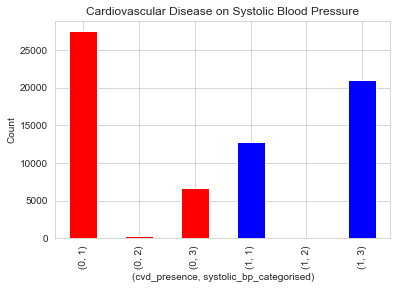

In [73]:
Count_Systolic_Visualization.plot.bar(xlabel="(cvd_presence, systolic_bp_categorised)",ylabel="Count",
                                      title= "Cardiovascular Disease on Systolic Blood Pressure",
                                      color=['red','red','red','blue','blue','blue'],label=True)

b) Diastolic Blood Pressure

<AxesSubplot:title={'center':'Cardiovascular Disease on Diastolic Blood Pressure'}, xlabel='(cvd_presence, diastolic_bp_categorised)', ylabel='Count'>

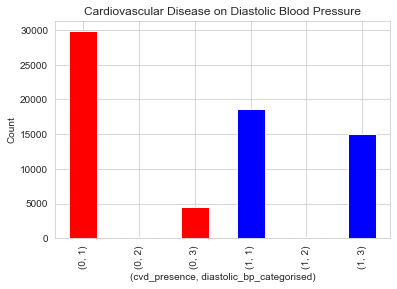

In [74]:
Count_Diastolic_Visualization.plot.bar(xlabel="(cvd_presence, diastolic_bp_categorised)",ylabel="Count",
                                       title= "Cardiovascular Disease on Diastolic Blood Pressure",
                                       color=['red','red','red','blue','blue','blue'],label=True)

c) Smoke

<AxesSubplot:title={'center':'Cardiovascular Disease on Smoking'}, xlabel='(cvd_presence, smoke)', ylabel='Count'>

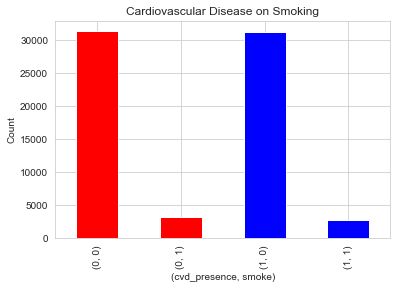

In [75]:
Count_Smoke_Visualization.plot.bar(xlabel="(cvd_presence, smoke)", ylabel="Count",
                                   title= "Cardiovascular Disease on Smoking",
                                   color=['red','red','blue','blue'],label=True)

d) Alcohol

<AxesSubplot:title={'center':'Cardiovascular Disease on Alcohol'}, xlabel='(cvd_presence, alcohol)', ylabel='Count'>

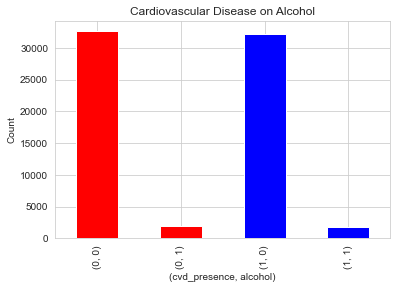

In [76]:
Count_Alcohol_Visualization.plot.bar(xlabel="(cvd_presence, alcohol)", ylabel="Count",
                                     title= "Cardiovascular Disease on Alcohol",
                                     color=['red','red','blue','blue'],label=True)

e) Physical Activity

<AxesSubplot:title={'center':'Cardiovascular Disease on Physical Activity'}, xlabel='(cvd_presence, physical_activity)', ylabel='Count'>

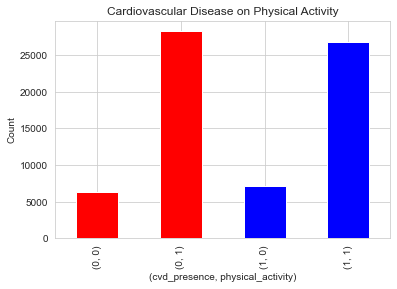

In [77]:
Count_Active_Visualization.plot.bar(xlabel="(cvd_presence, physical_activity)", ylabel="Count",
                                    title= "Cardiovascular Disease on Physical Activity",
                                    color=['red','red','blue','blue'],label=True)

f) Cholesterol

<AxesSubplot:title={'center':'Cardiovascular Disease on Cholesterol'}, xlabel='(cvd_presence, cholesterol)', ylabel='Count'>

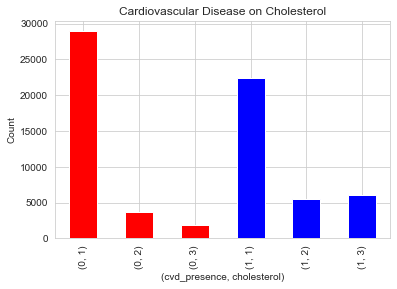

In [78]:
Count_Cholesterol_Visualization.plot.bar(xlabel="(cvd_presence, cholesterol)", ylabel="Count",
                                         title= "Cardiovascular Disease on Cholesterol",
                                         color=['red','red','red','blue','blue','blue'],label=True)

g) Glucose

<AxesSubplot:title={'center':'Cardiovascular Disease on Glucose'}, xlabel='(cvd_presence, glucose)', ylabel='Count'>

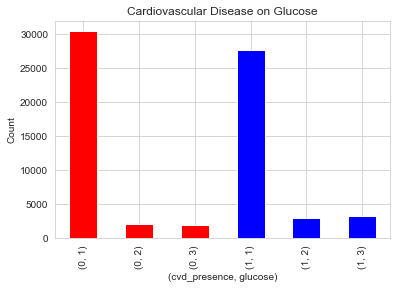

In [79]:
Count_Glucose_Visualization.plot.bar(xlabel="(cvd_presence, glucose)", ylabel="Count",
                                     title= "Cardiovascular Disease on Glucose",
                                     color=['red','red','red','blue','blue','blue'],label=True)

2. Are gender plays an important role of the risk of getting cardiovascular disease?

<AxesSubplot:title={'center':'Cardiovascular Disease on Gender'}, xlabel='(gender, cvd_presence)', ylabel='Count'>

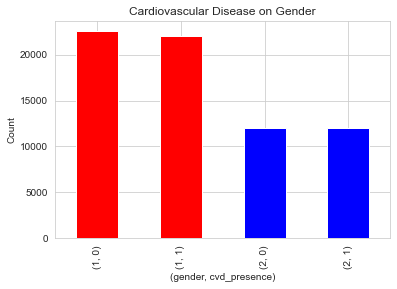

In [80]:
Gender_Count.plot.bar(xlabel="(gender, cvd_presence)",ylabel="Count",
                      title= "Cardiovascular Disease on Gender",
                      color=['red','red','blue','blue'],label=True)

3. What is the percentage of woman to get cardiovascular disease compared to man?

Text(0.5, 1.0, 'Percentage of Cardiovascular Disease on Gender')

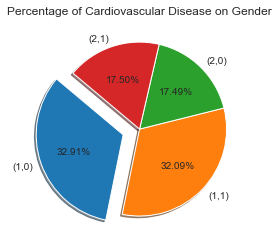

In [81]:
Gender_Count2.insert(2, "(gender, cvd_presence)", ["(1,0)","(1,1)","(2,0)","(2,1)"], True)

gender = Gender_Count2["(gender, cvd_presence)"]
percentage = Gender_Count2["percentage"]
myexplode = [0.2, 0, 0, 0]
plt.pie(percentage, labels=gender, explode=myexplode,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title("Percentage of Cardiovascular Disease on Gender")

4.Can physical activities (exercise) help in reducing the risk of getting cardiovascular disease?

<AxesSubplot:title={'center':'Cardiovascular Disease on Physical Activity'}, xlabel='(physical_activity, cvd_presence)', ylabel='Count'>

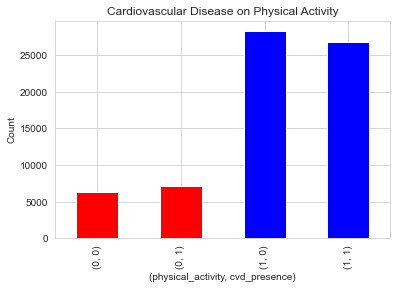

In [82]:
Count_Active2.plot.bar(xlabel="(physical_activity, cvd_presence)", ylabel="Count",
                      title= "Cardiovascular Disease on Physical Activity",
                      color=['red','red','blue','blue'],label=True)

<AxesSubplot:xlabel='physical_activity', ylabel='cvd_presence'>

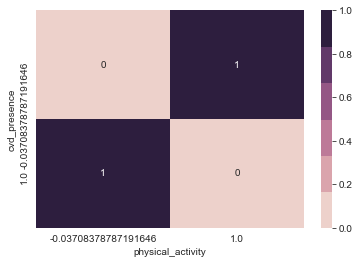

In [83]:
e1 = pd.crosstab(exercises.cvd_presence, exercises.physical_activity)
sns.heatmap(e1, annot=True,cmap=sns.cubehelix_palette())

5. Are physical activities affects the systolic blood pressure and diastolic blood pressure?

a) Systolic Blood Pressure

<AxesSubplot:xlabel='physical_activity', ylabel='systolic_bp'>

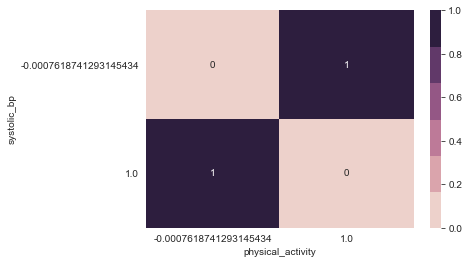

In [84]:
s = pd.crosstab(systolic_corr.systolic_bp, systolic_corr.physical_activity)
sns.heatmap(s, annot=True,cmap=sns.cubehelix_palette())

b) Diastolic Blood Pressure

<AxesSubplot:xlabel='physical_activity', ylabel='diastolic_bp'>

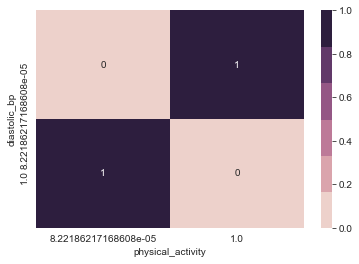

In [85]:
d = pd.crosstab(diastolic_corr.diastolic_bp, diastolic_corr.physical_activity)
sns.heatmap(d, annot=True,cmap=sns.cubehelix_palette())

6. Can diabetes be one of the factors that lead to cardiovascular disease?

<AxesSubplot:title={'center':'Cardiovascular Disease on Glucose'}, xlabel='(Diabetes, CVD_Presence)', ylabel='Count'>

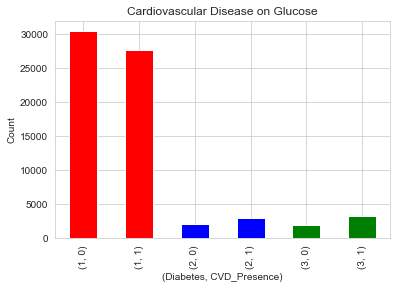

In [86]:
diabetes.plot.bar(xlabel='(Diabetes, CVD_Presence)',ylabel="Count",
                  title= 'Cardiovascular Disease on Glucose',
                  color=['red','red','blue','blue','green','green'])

<AxesSubplot:xlabel='glucose', ylabel='cvd_presence'>

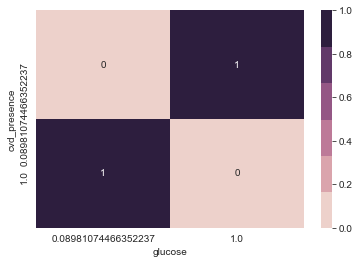

In [87]:
d1 = pd.crosstab(diabetes_corr.cvd_presence, diabetes_corr.glucose)
sns.heatmap(d1, annot=True,cmap=sns.cubehelix_palette())

7. Are BMIs playing an importance role of the risk of getting cardiovascular disease?

<AxesSubplot:title={'center':'Cardiovascular Disease on BMI'}, xlabel='(bmi, CVD_Presence)', ylabel='Count'>

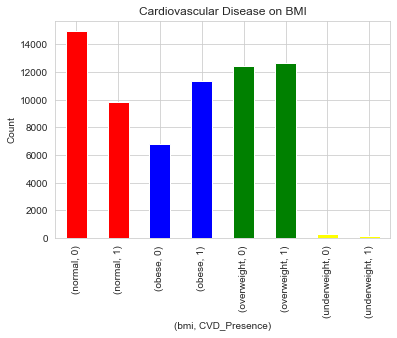

In [88]:
BMI_Count.plot.bar(xlabel='(bmi, CVD_Presence)',ylabel="Count",
                  title= 'Cardiovascular Disease on BMI',
                  color=['red','red','blue','blue','green','green','yellow','yellow'])

8. Are lifestyles affecting the risk of getting cardiovascular disease?

a) Smoke

<AxesSubplot:xlabel='smoke', ylabel='cvd_presence'>

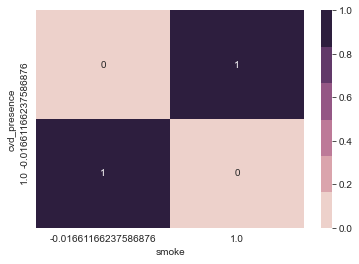

In [89]:
s1 = pd.crosstab(smoke_corr.cvd_presence, smoke_corr.smoke)
sns.heatmap(s1, annot=True,cmap=sns.cubehelix_palette())

b) Alcohol

<AxesSubplot:xlabel='alcohol', ylabel='cvd_presence'>

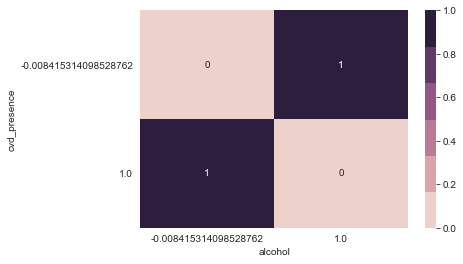

In [90]:
a1 = pd.crosstab(alcohol_corr.cvd_presence, alcohol_corr.alcohol)
sns.heatmap(a1, annot=True,cmap=sns.cubehelix_palette())

c) Physical Activity

<AxesSubplot:xlabel='physical_activity', ylabel='cvd_presence'>

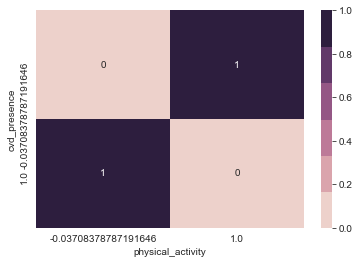

In [91]:
p1 = pd.crosstab(physicalActivity_corr.cvd_presence, physicalActivity_corr.physical_activity)
sns.heatmap(p1, annot=True,cmap=sns.cubehelix_palette())

9.How can we do to prevent, control and manage the cardiovascular disease?

10. What is the percentage of lifestyles affecting the risk of getting cardiovascular disease?

a) Smoke

Text(0.5, 1.0, 'Percentage of Cardiovascular Disease on Smoke')

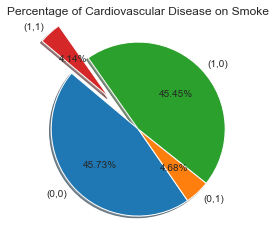

In [92]:
Count_Smoke.insert(2, "(cvd_presence, smoke)", ["(0,0)","(0,1)","(1,0)","(1,1)"], True)

smoke = Count_Smoke["(cvd_presence, smoke)"]
percentage = Count_Smoke["percentage"]
myexplode = [0, 0, 0, 0.5]
plt.pie(percentage, labels=smoke, explode=myexplode,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title("Percentage of Cardiovascular Disease on Smoke")

b) Alcohol

Text(0.5, 1.0, 'Percentage of Cardiovascular Disease on Alcohol')

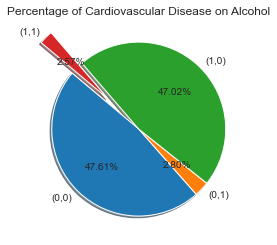

In [93]:
Count_Alcohol.insert(2, "(cvd_presence, alcohol)", ["(0,0)","(0,1)","(1,0)","(1,1)"], True)

alcohol = Count_Alcohol["(cvd_presence, alcohol)"]
percentage = Count_Alcohol["percentage"]
myexplode = [0, 0, 0, 0.5]
plt.pie(percentage, labels=alcohol, explode=myexplode,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title("Percentage of Cardiovascular Disease on Alcohol")

c) Percentage of physical_activity

Text(0.5, 1.0, 'Percentage of Cardiovascular Disease on Physical Activity')

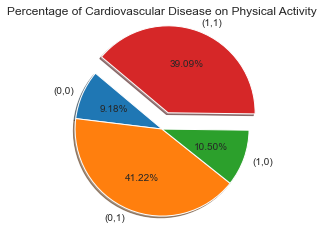

In [94]:
Count_Active.insert(2, "(cvd_presence, active)", ["(0,0)","(0,1)","(1,0)","(1,1)"], True)

active = Count_Active["(cvd_presence, active)"]
percentage = Count_Active["percentage"]
myexplode = [0, 0, 0, 0.2]
plt.pie(percentage, labels=active, explode=myexplode,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title("Percentage of Cardiovascular Disease on Physical Activity")

11. Can healthy diet prevent and control the risk of getting cardiovascular disease?

a) Cholesterol

Text(0.5, 1.0, 'Percentage of Cardiovascular Disease on Cholesterol')

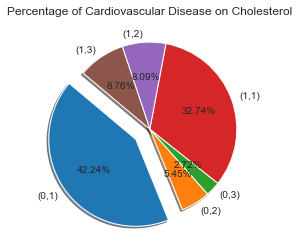

In [95]:
Count_Cholesterol.insert(2, "(cholesterol, cvd_presence)", ["(0,1)","(0,2)","(0,3)","(1,1)","(1,2)","(1,3)"], True)

cholesterol = Count_Cholesterol["(cholesterol, cvd_presence)"]
percentage = Count_Cholesterol["percentage"]
myexplode = [0.2, 0, 0, 0, 0, 0]
plt.pie(percentage, labels=cholesterol, explode=myexplode,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title("Percentage of Cardiovascular Disease on Cholesterol")

b) Glucose

Text(0.5, 1.0, 'Percentage of Cardiovascular Disease on Glucose')

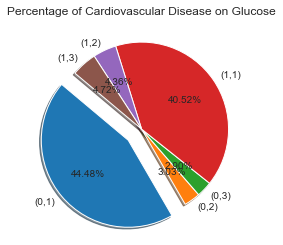

In [96]:
Count_Glucose.insert(2, "(glucose, cvd_presence)", ["(0,1)","(0,2)","(0,3)","(1,1)","(1,2)","(1,3)"], True)

cholesterol = Count_Glucose["(glucose, cvd_presence)"]
percentage = Count_Glucose["percentage"]
myexplode = [0.2, 0, 0, 0, 0, 0]
plt.pie(percentage, labels=cholesterol, explode=myexplode,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.title("Percentage of Cardiovascular Disease on Glucose")

In [ ]:
#12.Prediction of the numbers of people getting cardiovascular disease if they are not taking care of their diet and lifestyle?

x=cvd_df.iloc[:,7:10].values
y=cvd_df.iloc[:,11].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

In [ ]:
y_pred = classifier.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

## Machine Learning

In [97]:
#Import all required libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, jaccard_score, classification_report, 
                            log_loss, roc_auc_score, roc_curve)

In [98]:
#Data selection and set target feature as integer
cvd_df['cvd_presence'] = cvd_df['cvd_presence'].astype('int')

In [99]:
#Define X and Y arrays for the dataset
X = np.asarray(cvd_df[['age','gender','height','weight','systolic_bp','diastolic_bp','cholesterol',
                       'glucose','smoke','alcohol','physical_activity']])
Y = np.asarray(cvd_df['cvd_presence'])
X[0:5]

array([[ 50.,   2., 168.,  62., 110.,  80.,   1.,   1.,   0.,   0.,   1.],
       [ 55.,   1., 156.,  85., 140.,  90.,   3.,   1.,   0.,   0.,   1.],
       [ 51.,   1., 165.,  64., 130.,  70.,   3.,   1.,   0.,   0.,   0.],
       [ 48.,   2., 169.,  82., 150., 100.,   1.,   1.,   0.,   0.,   1.],
       [ 47.,   1., 156.,  56., 100.,  60.,   1.,   1.,   0.,   0.,   0.]])

In [100]:
#Normalize the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.41869041,  1.36294738,  0.44014764, -0.86423037, -0.99596744,
        -0.14249002, -0.53740102, -0.39535678, -0.31101826, -0.2382645 ,
         0.49505451],
       [ 0.32046382, -0.73370404, -1.03187471,  0.75641491,  0.79641235,
         0.88618491,  2.40650799, -0.39535678, -0.31101826, -0.2382645 ,
         0.49505451],
       [-0.27085957, -0.73370404,  0.07214205, -0.72330469,  0.19895242,
        -1.17116494,  2.40650799, -0.39535678, -0.31101826, -0.2382645 ,
        -2.01997956],
       [-0.71435211,  1.36294738,  0.56281617,  0.5450264 ,  1.39387228,
         1.91485984, -0.53740102, -0.39535678, -0.31101826, -0.2382645 ,
         0.49505451],
       [-0.86218295, -0.73370404, -1.03187471, -1.28700739, -1.59342737,
        -2.19983987, -0.53740102, -0.39535678, -0.31101826, -0.2382645 ,
        -2.01997956]])

In [101]:
#Split dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=1)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (45897, 11) (45897,)
Test set: (22606, 11) (22606,)


In [102]:
#Fitting the model with train set
LR_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)

In [103]:
#Prediction using the model
Y_predict = LR_model.predict(X_test)
Y_predict_prob = LR_model.predict_proba(X_test)

print(Y_predict)
print(Y_predict_prob)

[1 0 0 ... 0 0 1]
[[0.23269504 0.76730496]
 [0.58703377 0.41296623]
 [0.61233351 0.38766649]
 ...
 [0.697886   0.302114  ]
 [0.76768856 0.23231144]
 [0.31351129 0.68648871]]


Text(0.5, 34.0, 'Predicted Values')

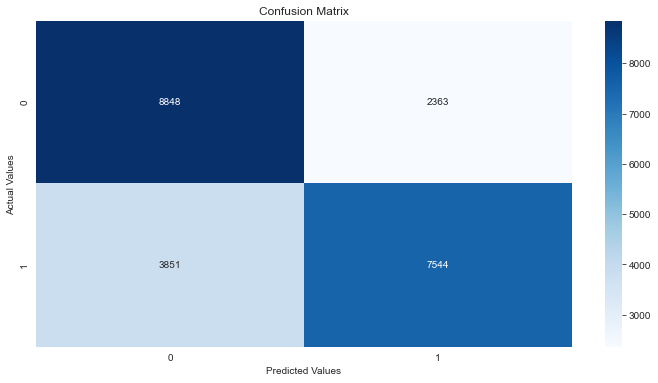

In [104]:
#Visualizing Prediction using Confusion Matrix
CM = confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(CM, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [105]:
#Evaluate Jaccard Index
jaccard_score(Y_test, Y_predict, pos_label=0)

0.5874385871730182

In [106]:
#Evaluate Precision, Recall and F1 Score
print (classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     11211
           1       0.76      0.66      0.71     11395

    accuracy                           0.73     22606
   macro avg       0.73      0.73      0.72     22606
weighted avg       0.73      0.73      0.72     22606



In [107]:
#Evaluate log loss
log_loss(Y_test, Y_predict_prob)

0.5670037043524809

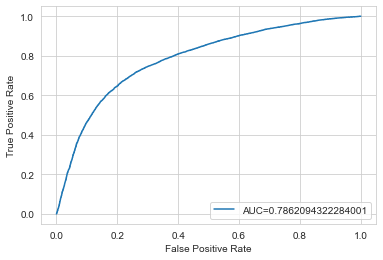

In [108]:
#Evaluate AUC score

#define metrics
Y_predict_proba = LR_model.predict_proba(X_test)[::,1]
false_positive_rate, true_positive_rate, _ = roc_curve(Y_test,  Y_predict_proba)
auc = roc_auc_score(Y_test, Y_predict_proba)

#create ROC curve
plt.plot(false_positive_rate,true_positive_rate,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)